          A         C         E         K         L         M         O
A  1.000000 -0.077369  0.022270  0.071350  0.058579  0.067277  0.224656
C -0.077369  1.000000 -0.038342 -0.005941 -0.001596 -0.009567 -0.006185
E  0.022270 -0.038342  1.000000  0.125241  0.081180  0.139487  0.326353
K  0.071350 -0.005941  0.125241  1.000000 -0.031297  0.082815  0.221688
L  0.058579 -0.001596  0.081180 -0.031297  1.000000  0.054575  0.147742
M  0.067277 -0.009567  0.139487  0.082815  0.054575  1.000000  0.223298
O  0.224656 -0.006185  0.326353  0.221688  0.147742  0.223298  1.000000
df Shape:  (31321, 15)
Train_x Shape:  (25056, 107)
Train_y Shape:  (25056,)
Test_x Shape:  (6265, 107)
Test_y Shape:  (6265,)


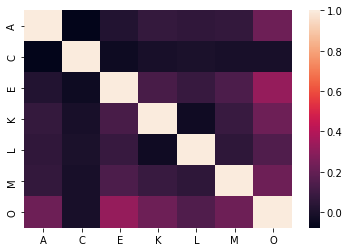

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns


from keras import models
from keras import layers
from keras import optimizers
import tensorflow

from numpy.random import seed
tensorflow.random.set_seed(2)

df = pd.read_csv('bench.csv', encoding='latin-1')

corr = df.corr()
sns.heatmap(corr)
print(corr)


df.dropna(inplace= True)
print ("df Shape: ", df.shape)
df = pd.get_dummies(df)
labels = np.array(df['O'])
df= df.drop('O', axis = 1)
df_list = list(df.columns)

train_x, test_x, train_y, test_y = train_test_split(df, labels, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)


print ("Train_x Shape: ",train_x.shape)
print ("Train_y Shape: ", train_y.shape)
print ("Test_x Shape: ", test_x.shape)
print ("Test_y Shape: ", test_y.shape)


In [3]:
network = models.Sequential()
network.add(layers.Dense(25, input_dim=107, activation="relu"))
network.add(layers.Dense(1, activation="sigmoid"))

opt = optimizers.RMSprop(learning_rate=0.01, epsilon=1e-07)
network.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

network.fit(train_x, train_y, epochs=30, batch_size=32)

nn_pred = network.predict_classes(test_x)
nn_pred_prob = network.predict(test_x)

print(confusion_matrix(test_y, nn_pred))
print("Accuracy:", accuracy_score(test_y, nn_pred))
print("Auc Score:", roc_auc_score(test_y, nn_pred))
print("Auc Score Prob:", roc_auc_score(test_y, nn_pred_prob))
print("Recall", recall_score(test_y, nn_pred))
print("Precission:", precision_score(test_y, nn_pred))
print("F1 Score:", f1_score(test_y, nn_pred))

Epoch 1/30
783/783 [==============================] - 1s 1ms/step - loss: 0.3676 - accuracy: 0.8287
Epoch 2/30
783/783 [==============================] - 1s 1ms/step - loss: 0.3338 - accuracy: 0.8494
Epoch 3/30
783/783 [==============================] - 1s 1000us/step - loss: 0.3329 - accuracy: 0.8534
Epoch 4/30
783/783 [==============================] - 1s 1ms/step - loss: 0.3363 - accuracy: 0.8548
Epoch 5/30
783/783 [==============================] - 1s 1ms/step - loss: 0.3523 - accuracy: 0.8541
Epoch 6/30
783/783 [==============================] - 1s 1ms/step - loss: 0.3647 - accuracy: 0.8496
Epoch 7/30
783/783 [==============================] - 1s 1ms/step - loss: 0.3792 - accuracy: 0.8515
Epoch 8/30
783/783 [==============================] - 1s 1ms/step - loss: 0.4172 - accuracy: 0.8514
Epoch 9/30
783/783 [==============================] - 1s 1ms/step - loss: 0.4364 - accuracy: 0.8552
Epoch 10/30
783/783 [==============================] - 1s 1ms/step - loss: 0.4729 - accuracy: 0.8

/home/hasan/code/jupyterenvironment/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[4415  345]
 [ 584  921]]
Accuracy: 0.8517158818834797
Auc Score: 0.7697405706468634
Auc Score Prob: 0.8896804070465395
Recall 0.6119601328903654
Precission: 0.7274881516587678
F1 Score: 0.664741970407795
